# Study of symmetric and asymmetric fission of Flevorium-288

## by Yuliia Hrabar

## Table of content 
* [Intructions on how to run the notebook](#run)
* [Abstract](#abstract)

* [Importing python packages](#import)

* [Reading simulation data from files](#read)
    * [Extracting information from root trees](#root)
    * [Storing extracted ROOT data as DataFrame into ASCII file](#ascii)
    * [Loading data from an ASCII file](#loading)

* [Asymmetric fission case](#asymmetric)
    * [Constructing  a histogram for implantation detector ](#histo_imp)
    * [Constructing  a histogram for box detectors ](#histo_box)
    * [Energy deposited in implantation vs box detectors](#imp_box)
        * [Events that were registered both at implantation detector and box detectors at the same time](#same)
        * [All events registered at the implantation detector and box detectors](#all_events)

* [Results of all simulations](#all_simulations)
    * [Plots of all simulations](#plots_all)
    * [Plot selected simulation](#plot_selected)


## Instructions on how to run the notebook <a name="run"></a>


## Abstract <a name="abstract"></a>

The purpose of this _jupyter notebook_ is to analyze the data produced from simulating fission of Super Heavy Element (SHE) Flevorium and TASISpec detector setup. 

The data was produced by simulating [TASISpec](https://portal.research.lu.se/portal/files/3183833/4004479.pdf) detector setup in [Geant4](https://geant4.web.cern.ch/). Geant4 is a toolkit for simulating the passage of particles through matter. TASISpec setup combines composite Ge- and Si-detectors (shown on Figure 1 in blue and surrounded by green respectively) for a new detector setup aimed towards multi-coincidence gamma -ray, X-ray, conversion electron, fission fragment, and a-particle spectroscopy of the heaviest nuclei. 

 <figure>
  <img src="tasispec.jpg" alt="Drawing" style="width: 350px;" align="center">
  <figcaption style="text-align:center">Figure 1 - The full virtual TASISpec setup.  All the Ge-crystals are depicted in blue and Si-detectors are surrounded by green colour. </figcaption>
</figure> 

Main detectors of interest from the TASISpec setup for the simulation of fission products are four double-sided silicon strip detectors (DSSSDs) constructing a 'box detector' and one DSSSD facing a particle beam line - an 'implantation detector' (Figure 2). 
 <figure>
  <img src="dsssds.jpg" alt="Drawing" style="width: 250px;" align="center">
  <figcaption style="text-align:center">Figure 2 - Si-detectors: the implantation detector and box DSSSDs.[1](https://www.sciencedirect.com/science/article/pii/S0168900211021425#f0020)</figcaption>
</figure> 

Fission of Flevorium-288 was simulated in Geant4 in the following way: two fission products were implanted in the implantation detector at the depth of $ 4 \mu m$, and position randomly selected from a 2D gaussian distribution. Vector of momentum direction was randomly assigned to one fission product and the second fission product had momentum direction opposite to the first one. 3x3 scenarios were simulated - two cases of asymmetric fission (A1/A2 = 0.38 and 0.73) and a case of symmetric fission (A1/A2 = 1) for total kinetic energies of 225, 250 and 275 MeV. Parameters such as atomic number, mass number and kinetic energies of fission fragments used for the scenarios are presented in the following table. 

| TKE [MeV] | A1 | A2 | E1 [MeV] | E2 [MeV] | Z1 | Z2 |
|------|------|------|------|------|------|------|
| 225 	| 80.0 	| 208.0 | 162.5000 | 62.5000  | 35.0 | 79.0 |  
| 225 	| 122.0 | 166.0 | 129.6875 | 95.3125  | 51.0 | 63.0 | 	
| 225 	| 144.0 | 144.0 | 112.5000 | 112.5000 | 59.0 | 55.0 | 
| 250 	| 80.0 	| 208.0 | 180.5556 | 69.4444  | 35.0 | 79.0 | 
| 250 	| 122.0 | 166.0 | 144.0972 | 105.9028 | 51.0 | 63.0 | 
| 250 	| 144.0 | 144.0 | 125.0000 | 125.0000 | 59.0 | 55.0 | 	
| 275 	| 80.0 	| 208.0 | 198.6111 | 76.38889 | 35.0 | 79.0 | 
| 275 	| 122.0 | 166.0 | 158.5069 | 116.4931 | 51.0 | 63.0 | 
| 275 	| 144.0 | 144.0 | 137.5000 | 137.5000 | 59.0 | 55.0 | 

The main idea behind the study is to investigate based on simulations if TASISpec set-up (including dead layers) is sensitive to asymmetric fission during real experiments for creating Flevorium.

The data analysis can roughly be divided into four steps:
1. Read simulated data from ROOT files into pandas DataFrame
2. Maniplate and group data to plot histograms for implantation and box detectors 
3. Maniplate and group data to plot energy deposited in the implant detector vs. box detectors



# Importing python packages<a name="import"></a>

In [1]:
import ROOT
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/02


# Reading simulation data from files<a name="read"></a>

## Extracting information from ROOT trees <a name="root"></a>

Extracting information from ROOT trees into pandas DataFrame. 

In [2]:
# Creating DataFrame to fill from ROOT data files
data = pd.DataFrame({'TKE': [], 'A1': [], 'A2': [], 'Event': [], 'Energy': [], 'DetID': []}) 
data

,TKE,A1,A2,Event,Energy,DetID


In [3]:
import os
import glob
import re
for filepath in glob.glob(os.path.join('resources', '*.root')):
    print('Reading data from file: ', filepath)
    regex = re.compile(r'\d+')
    idet = [int(x) for x in regex.findall(filepath)] # read TKE, A1, A2 from filename
    print('TKE={}, A1={}, A2={}'.format(idet[0], idet[1], idet[2]))
    f = ROOT.TFile.Open(filepath)
    rawTree = f.Get("PICO_tree_raw")
    for idx, event in enumerate(rawTree): 
        for i in range(event.Mult):
            data = data.append({'TKE': idet[0], 'A1': idet[1], 'A2': idet[2], 'Event': idx,'Energy': event.Energy[i], 'DetID': event.det_ID[i]}, ignore_index=True)


Reading data from file:  resources/PICOSpec_275_80_208.root
TKE=275, A1=80, A2=208
Reading data from file:  resources/PICOSpec_250_80_208.root
TKE=250, A1=80, A2=208
Reading data from file:  resources/PICOSpec_225_122_166.root
TKE=225, A1=122, A2=166
Reading data from file:  resources/PICOSpec_225_80_208.root
TKE=225, A1=80, A2=208
Reading data from file:  resources/PICOSpec_250_144_144.root
TKE=250, A1=144, A2=144
Reading data from file:  resources/PICOSpec_275_122_166.root
TKE=275, A1=122, A2=166
Reading data from file:  resources/PICOSpec_275_144_144.root
TKE=275, A1=144, A2=144
Reading data from file:  resources/PICOSpec_250_122_166.root
TKE=250, A1=122, A2=166
Reading data from file:  resources/PICOSpec_225_144_144.root
TKE=225, A1=144, A2=144


In [4]:
data

,TKE,A1,A2,Event,Energy,DetID
0,275.0,80.0,208.0,0.0,212741.206172,593.0
1,275.0,80.0,208.0,1.0,242398.394726,791.0
2,275.0,80.0,208.0,2.0,217798.729647,559.0
3,275.0,80.0,208.0,3.0,209489.598308,432.0
4,275.0,80.0,208.0,4.0,138167.626610,530.0
...,...,...,...,...,...,...
36505,225.0,144.0,144.0,2488.0,9762.911218,1831.0
36506,225.0,144.0,144.0,2488.0,231.850076,851.0
36507,225.0,144.0,144.0,2489.0,185626.006456,531.0
36508,225.0,144.0,144.0,2489.0,0.154071,1374.0


In [5]:
data.set_index(['TKE', 'A1', 'A2'],inplace=True)

In [6]:
data

Event         Energy   DetID
TKE   A1    A2                                  
275.0 80.0  208.0     0.0  212741.206172   593.0
            208.0     1.0  242398.394726   791.0
            208.0     2.0  217798.729647   559.0
            208.0     3.0  209489.598308   432.0
            208.0     4.0  138167.626610   530.0
...                   ...            ...     ...
225.0 144.0 144.0  2488.0    9762.911218  1831.0
            144.0  2488.0     231.850076   851.0
            144.0  2489.0  185626.006456   531.0
            144.0  2489.0       0.154071  1374.0
            144.0  2489.0     142.757846   531.0

[36510 rows x 3 columns]

## Storing extracted ROOT data as DataFrame into ASCII file <a name="ascii"></a>

In [7]:
data.to_pickle('fission_data.pk1')

In [8]:
del data 

## Loading data from an ASCII file <a name="loading"></a>

In [9]:
filename = 'fission_data.pk1'
my_list = !ls
if filename in my_list: # check if the file exists in the current directory list 
    data = pd.read_pickle('fission_data.pk1')
data

Event         Energy   DetID
TKE   A1    A2                                  
275.0 80.0  208.0     0.0  212741.206172   593.0
            208.0     1.0  242398.394726   791.0
            208.0     2.0  217798.729647   559.0
            208.0     3.0  209489.598308   432.0
            208.0     4.0  138167.626610   530.0
...                   ...            ...     ...
225.0 144.0 144.0  2488.0    9762.911218  1831.0
            144.0  2488.0     231.850076   851.0
            144.0  2489.0  185626.006456   531.0
            144.0  2489.0       0.154071  1374.0
            144.0  2489.0     142.757846   531.0

[36510 rows x 3 columns]

# Asymmetric fission case <a name="asymmetric"></a>

Extract part of data describing asymmetric fission with TKE 225 MeV and fission products A1= 80 and A2=208

In [10]:
asymm225 = data.loc[225,80,208] 
asymm225

/home/yulia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Event         Energy   DetID
TKE   A1   A2                                  
225.0 80.0 208.0     0.0  179975.340555   593.0
           208.0     1.0  197161.053794   560.0
           208.0     2.0  189286.227911   689.0
           208.0     3.0  197137.782189   530.0
           208.0     4.0  187626.312494   462.0
...                  ...            ...     ...
           208.0  2489.0  203418.884775   651.0
           208.0  2490.0  127521.907898   429.0
           208.0  2490.0   21140.290201  1576.0
           208.0  2491.0  194786.887407   620.0
           208.0  2492.0  189802.638374   627.0

[3251 rows x 3 columns]

## Constructing  a histogram for implantation detector <a name="histo_imp"></a>

Choose energies detected in the implantation detector

In [11]:
E_imp_histo = (asymm225.loc[asymm225['DetID']<1024].Energy)
E_imp_histo


TKE    A1    A2   
225.0  80.0  208.0    179975.340555
             208.0    197161.053794
             208.0    189286.227911
             208.0    197137.782189
             208.0    187626.312494
                          ...      
             208.0    203531.938201
             208.0    203418.884775
             208.0    127521.907898
             208.0    194786.887407
             208.0    189802.638374
Name: Energy, Length: 2525, dtype: float64

<IPython.core.display.Javascript object>


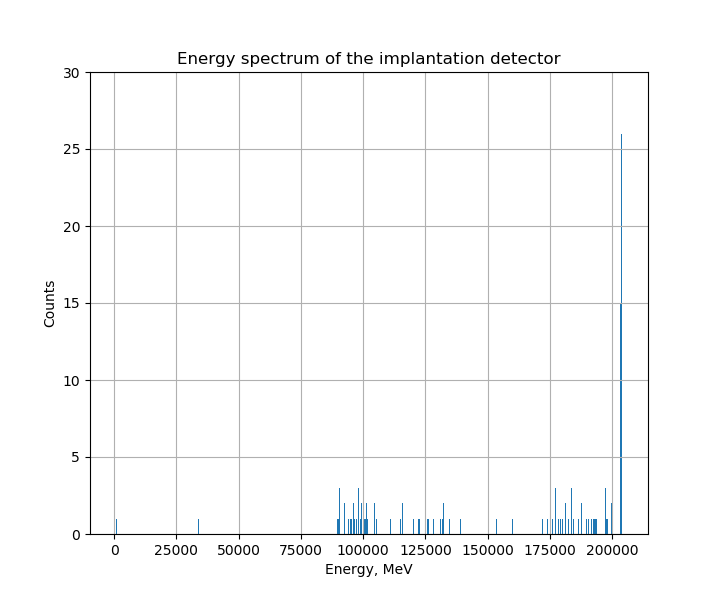

In [12]:
plt.figure(num=None, figsize=(7.2, 6))
ax_imp = E_imp_histo.plot.hist(grid=True,bins=10000)
ax_imp.set(title = 'Energy spectrum of the implantation detector', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_imp.set_ylim([0,30])
plt.savefig('implant_histogram.eps', format='eps', dpi=300)

## Constructing  a histogram for box detectors <a name="histo_box"></a>

Choose energies detected in the implantation detector

In [13]:
E_box_histo = asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)].Energy
E_box_histo

TKE    A1    A2   
225.0  80.0  208.0    36220.159466
             208.0    57303.944403
             208.0    37498.467656
             208.0    37804.762969
             208.0    56059.286660
                          ...     
             208.0    23242.576705
             208.0    50152.627861
             208.0     3440.366897
             208.0    14871.048305
             208.0    21140.290201
Name: Energy, Length: 625, dtype: float64

<IPython.core.display.Javascript object>


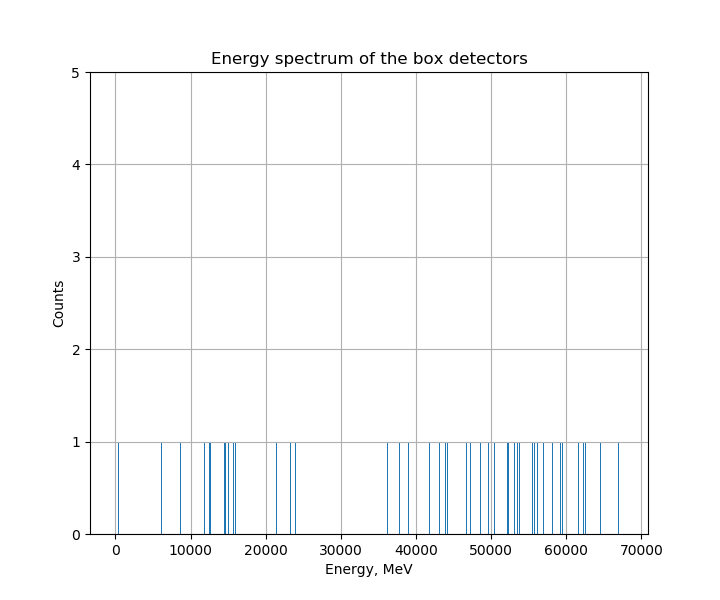

In [14]:
plt.figure(num=None, figsize=(7.2, 6))
ax_box = E_box_histo.plot.hist(grid=True, bins=10000)
ax_box.set(title = 'Energy spectrum of the box detectors', xlabel = 'Energy, MeV', ylabel = 'Counts')
ax_box.set_ylim([0,5])
plt.savefig('box_histogram.eps', format='eps', dpi=300)

## Energy deposited in implantation vs box detectors <a name="imp_box"></a>

Extract energies for the implantation detector and sum them for the same event 

In [15]:
df_imp = asymm225.loc[asymm225['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
df_imp

Event
0.0       179975.340555
1.0       197161.053794
2.0       189286.227911
3.0       197137.782189
4.0       187626.312494
              ...      
2488.0    203531.938201
2489.0    203418.884775
2490.0    127521.907898
2491.0    194786.887407
2492.0    189802.638374
Name: Energy, Length: 2493, dtype: float64

Extract energies for the box detectors and sum them for the same event 

In [16]:
df_box = (asymm225.loc[(asymm225['DetID']>1024) & (asymm225['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
df_box

Event
5.0       36220.159466
7.0       57303.944403
9.0       37498.467656
13.0      37804.762969
14.0      56059.286660
              ...     
2477.0    23242.576705
2478.0    50152.627861
2479.0     3440.366897
2480.0    14871.048305
2490.0    21140.290201
Name: Energy, Length: 623, dtype: float64

### Events that were registered both at implantation detector and box detectors at the same time  <a name="same"></a>

Join DataFrames for the implantation and box detectors based on the event

In [17]:
df_imp_box = pd.merge(df_box, df_imp, on='Event', suffixes=('_box', '_imp'))
df_imp_box

,Energy_box,Energy_imp
Event,,
5.0,36220.159466,118095.050808
7.0,57303.944403,101225.010162
9.0,37498.467656,117352.012256
13.0,37804.762969,114868.247162
14.0,56059.286660,101054.679940
...,...,...
2477.0,23242.576705,126232.315919
2478.0,50152.627861,106928.324827
2479.0,3440.366897,153530.007103


<IPython.core.display.Javascript object>


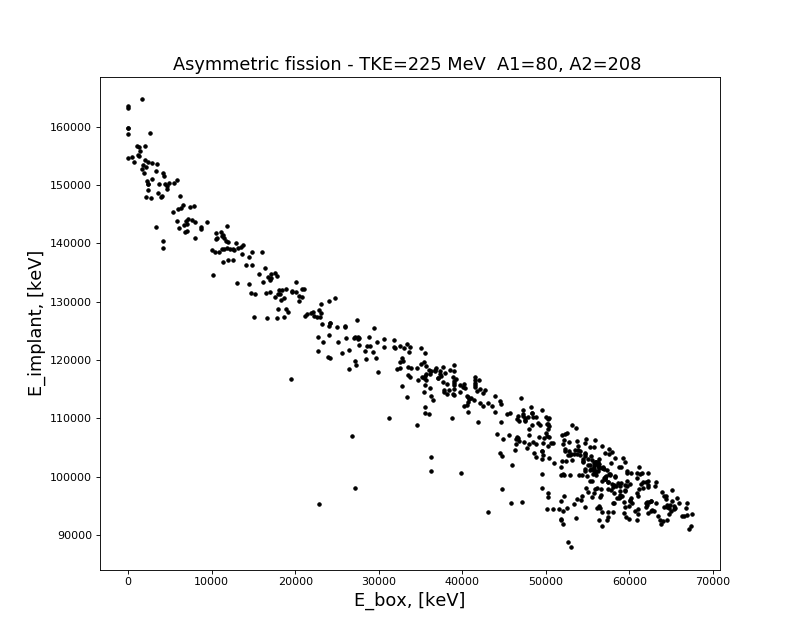

For N=2500 runs


In [18]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box.Energy_box, df_imp_box.Energy_imp, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=80, A2=208 ', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")

### All events registered at the implantation detector and box detectors <a name="all_events"></a>

In [19]:
df_imp_box_all = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
df_imp_box_all.fillna(0, inplace=True)
df_imp_box_all

,Energy_imp,Energy_box
Event,,
0.0,179975.340555,0.000000
1.0,197161.053794,0.000000
2.0,189286.227911,0.000000
3.0,197137.782189,0.000000
4.0,187626.312494,0.000000
...,...,...
2488.0,203531.938201,0.000000
2489.0,203418.884775,0.000000
2490.0,127521.907898,21140.290201


<IPython.core.display.Javascript object>


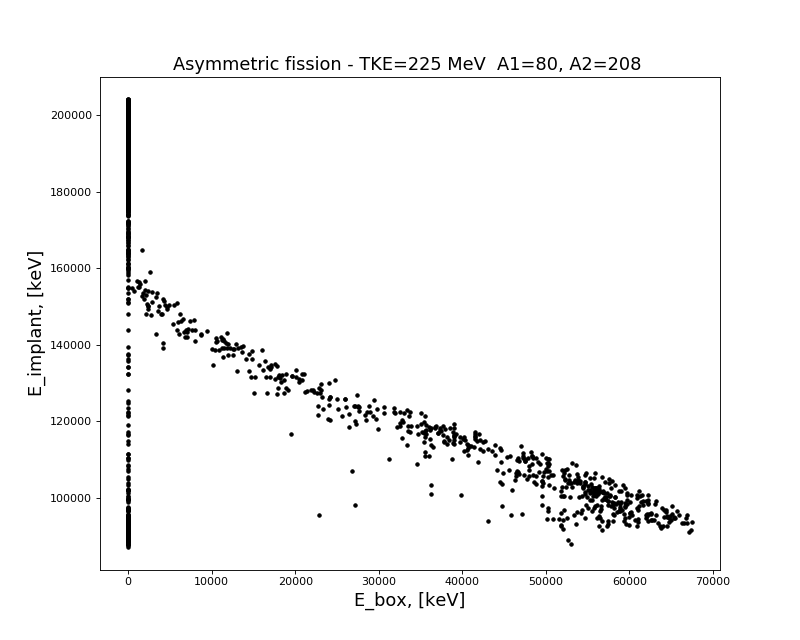

For N=2500 runs


In [20]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot( df_imp_box_all.Energy_box, df_imp_box_all.Energy_imp, '.', color='black');
plt.title('Asymmetric fission - TKE=225 MeV  A1=80, A2=208 ', fontsize=16)
plt.xlabel('E_box, [keV]', fontsize=16)
plt.ylabel('E_implant, [keV]', fontsize=16)

print("For N=2500 runs")

# Results of all simulations<a name="all_simulations"></a>

Define function `select_implant_box` energy to help plotting

In [21]:
def select_implant_box_energy(data, TKE, A1, A2):
    df = data.loc[TKE,A1,A2] 
    df_imp = df.loc[df['DetID']<1024].groupby(['Event'], sort=False).Energy.sum()
    df_box = (df.loc[(df['DetID']>1024) & (df['DetID']<2048)]).groupby(['Event'], sort=False).Energy.sum()
    df_final = pd.merge(df_imp, df_box, on='Event', how='outer', suffixes=('_imp', '_box'))
    df_final.fillna(0, inplace=True)
    E_box = df_final.Energy_box/1000
    E_imp = df_final.Energy_imp/1000
    return E_box, E_imp

## Plots of all simulations  <a name="plots_all"></a>

<IPython.core.display.Javascript object>


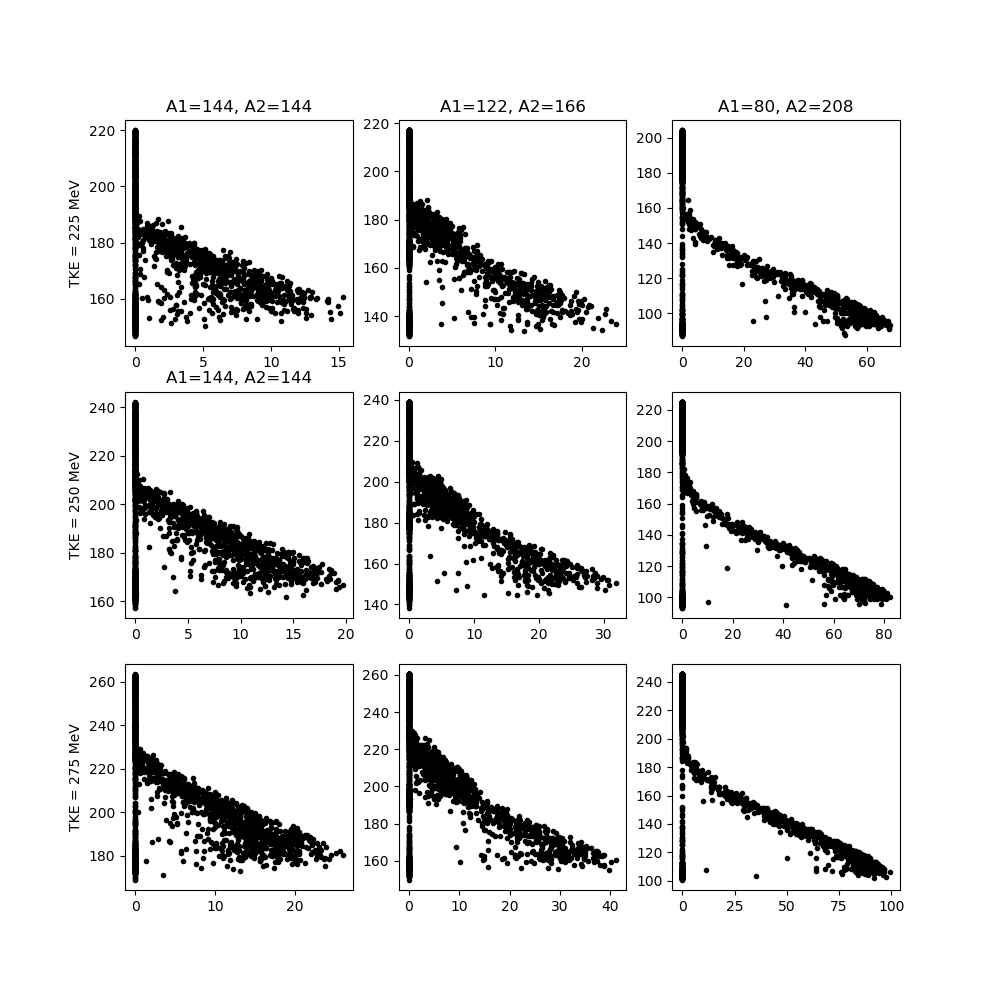

/home/yulia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [22]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))

# TKE = 225 MeV 
E_box, E_imp = select_implant_box_energy(data, 225, 144, 144)
axs[0, 0].plot(E_box, E_imp, '.', color='black')
axs[0, 0].set_title('A1=144, A2=144')
axs[0, 0].set(ylabel='TKE = 225 MeV')
#axs[0, 0].set_ylim([140, 225])

E_box, E_imp = select_implant_box_energy(data, 225, 122, 166)
axs[0, 1].plot(E_box, E_imp, '.', color='black')
axs[0, 1].set_title('A1=122, A2=166')

E_box, E_imp = select_implant_box_energy(data, 225, 80, 208)
axs[0, 2].plot(E_box, E_imp, '.', color='black')
axs[0, 2].set_title('A1=80, A2=208')

# TKE = 250 MeV
E_box, E_imp = select_implant_box_energy(data, 250, 144, 144)
axs[1,0].plot(E_box, E_imp, '.', color='black')
axs[1,0].set_title('A1=144, A2=144')
axs[1,0].set(ylabel='TKE = 250 MeV')

E_box, E_imp = select_implant_box_energy(data, 250, 122, 166)
axs[1,1].plot(E_box, E_imp, '.', color='black')
#axs[1,1].set_title('A1=122, A2=166')

E_box, E_imp = select_implant_box_energy(data, 250, 80, 208)
axs[1,2].plot(E_box, E_imp, '.', color='black')
#axs[1,2].set_title('A1=80, A2=208')

# TKE = 275 MeV
E_box, E_imp = select_implant_box_energy(data, 275, 144, 144)
axs[2,0].plot(E_box, E_imp, '.', color='black')
#axs[2,0].set_title('A1=144, A2=144')
axs[2,0].set(ylabel='TKE = 275 MeV')

E_box, E_imp = select_implant_box_energy(data, 275, 122, 166)
axs[2,1].plot(E_box, E_imp, '.', color='black')
#axs[2,1].set_title('A1=122, A2=166')

E_box, E_imp = select_implant_box_energy(data, 275, 80, 208)
axs[2,2].plot(E_box, E_imp, '.', color='black')
#axs[2,2].set_title('A1=80, A2=208')


# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='TKE = 225 MeV')

# # Hide  labels and tick labels for top plots and y ticks for right plots.
# for ay in axs.flat:
#     ay.label_outer()

## Plot selected simulation  <a name="plot_selected"></a>

In [23]:
from ipywidgets import interact, interactive, fixed

def plot_cos_decay(TKE, A):
    print(TKE)
    print(A[0])
    print(A[1])
    E_box, E_imp = select_implant_box_energy(data, TKE, A[0], A[1])
    plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot( E_box, E_imp, '.', color='black');
    plt.title(' TKE={} MeV  A1={}, A2={} '.format(TKE, A[0], A[1]), fontsize=16)
    plt.xlabel('E_box, [MeV]', fontsize=16)
    plt.ylabel('E_implant, [MeV]', fontsize=16)
    
  
    
interactive_plot = interactive(plot_cos_decay, TKE=[225, 250, 275], A=[('144, 144', [144, 144]), ('122, 166', [122, 166]), ('80, 208', [80, 208])])
interactive_plot.children[0].description=r'$TKE$' # slider
interactive_plot.children[1].description=r'$A$' # slider
interactive_plot

interactive(children=(Dropdown(description='$TKE$', options=(225, 250, 275), value=225), Dropdown(description=…